In [2]:
import glob
import pandas as pd
import tesserocr
from PIL import Image, ImageOps
from random import randint
from tqdm import tqdm

In [13]:
def grayscale(image):
    """Converts the image to grayscale."""
    return image.convert('L')


def threshold(image, threshold=127):
    """Applies a thresholding filter to the image."""
    return image.point(lambda x: 0 if x < threshold else 255)


def crop_image(image, crop_percentage_height=0.3, crop_percentage_width=0.1):
    width, height = image.size
    crop_height = int(height * crop_percentage_height)
    crop_width = int(width * crop_percentage_width)
    # Crop the image to the lower part
    return image.crop((crop_width, height - crop_height, width - crop_width, height))


def preprocess_image(image):
  #  image = crop_image(image)

    image = threshold(image, 220)

    image = grayscale(image)

    image = ImageOps.invert(image)

    return image

In [14]:
directory = r'D:\memes_code\tesstrain-main\data\kan11-ground-truth'
files = glob.glob(directory + '**/*.jpg', recursive=True) + glob.glob(directory + '**/*.png', recursive=True) + glob.glob(directory + '**/*.jpeg', recursive=True)

#

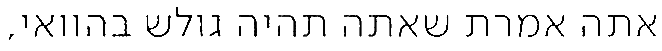

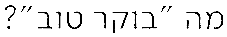

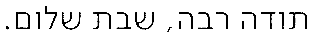

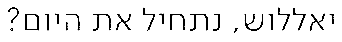

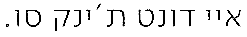

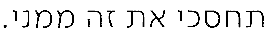

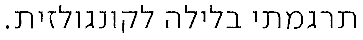

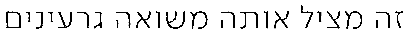

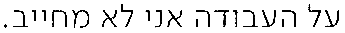

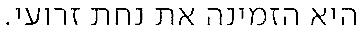

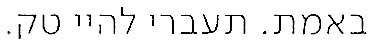

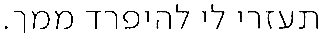

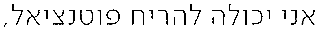

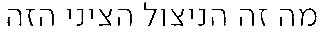

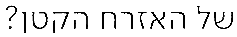

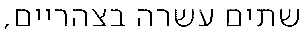

In [16]:
for f in files:
    image = Image.open(f)
    image = preprocess_image(image)
    display(image)
    tif_file_name = f.replace('.jpg', '.tif').replace('.jpeg', '.tif').replace('.png', '.tif')
    image.save(tif_file_name)
    text_gt_file_name = f.replace('.jpg', '.gt.txt').replace('.jpeg', '.gt.txt').replace('.png', '.gt.txt')
    with open(text_gt_file_name, 'w') as f:
        f.write('default')